In [674]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [675]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [676]:
# import the dataset
df = pd.read_csv("data/similar_to_coursera.csv",index_col=0)


In [677]:
df.head()

,PROMOTED_RUN_TITLE,ORGANISATION_TITLE,BUSINESS_MODEL,COUNT_UNIT_ENROLEMENT,UNLIMITED_ENRLEMENTS
SLUG,,,,,
starting-a-business-3,Starting a Business 3: Customers and Competitors,University of Leeds,UpgradedAccess,50617,272
introduction-to-forensic-science,Introduction to Forensic Science,University of Strathclyde,UpgradedAccess,125766,535
precalculus,Precalculus,University of Padova,UpgradedAccess,20732,196
bookkeeping-financial-accounting,Bookkeeping for Personal and Business Accounting,The Open University,UpgradedAccess,81244,297
heart-and-circulatory-diseases,It Starts with Your Heart: Understanding Heart...,British Heart Foundation,UpgradedAccess,10474,284


# Analyze the Dataset

In [678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5785 entries, starting-a-business-3 to h880-tobedeleted
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PROMOTED_RUN_TITLE     5785 non-null   object
 1   ORGANISATION_TITLE     5785 non-null   object
 2   BUSINESS_MODEL         5785 non-null   object
 3   COUNT_UNIT_ENROLEMENT  5785 non-null   int64 
 4   UNLIMITED_ENRLEMENTS   5785 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 271.2+ KB


In [679]:
df.columns

Index(['PROMOTED_RUN_TITLE', 'ORGANISATION_TITLE', 'BUSINESS_MODEL',
       'COUNT_UNIT_ENROLEMENT', 'UNLIMITED_ENRLEMENTS'],
      dtype='object')

In [680]:
df.isnull().sum()

PROMOTED_RUN_TITLE       0
ORGANISATION_TITLE       0
BUSINESS_MODEL           0
COUNT_UNIT_ENROLEMENT    0
UNLIMITED_ENRLEMENTS     0
dtype: int64

# Data Visulation

NoPurchase           2590
UpgradedAccess       2174
SponsoredAccess       485
ExpertTrackAccess     466
PaidForAccess          69
Unknown                 1
Name: BUSINESS_MODEL, dtype: int64


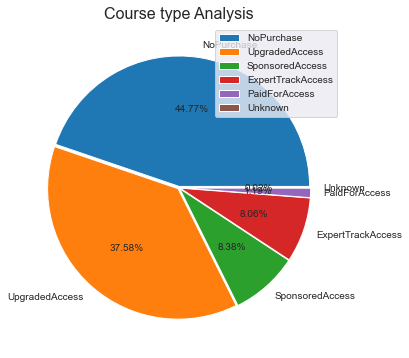

In [681]:
labels=['NoPurchase','UpgradedAccess','SponsoredAccess','ExpertTrackAccess','PaidForAccess','Unknown']
data=df.BUSINESS_MODEL.value_counts()
print(data)

plt.figure(figsize=(20,6))
plt.pie(data,labels=labels,explode=[0.01,0.01,0.01,0.01,0.01,0.01],autopct='%0.02f%%')
plt.title("Course type Analysis",fontsize=16)

plt.legend()
plt.show()



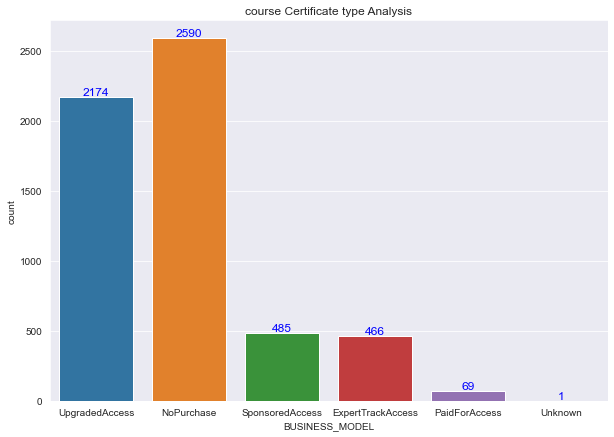

In [682]:



plt.figure(figsize=(10,7))
plt.title("course Certificate type Analysis")

ax=sns.countplot(x="BUSINESS_MODEL",data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


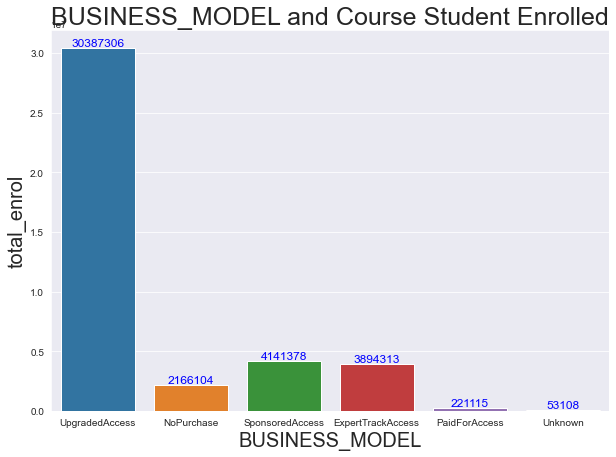

In [683]:
df['total_enrol'] = df.groupby('BUSINESS_MODEL')['COUNT_UNIT_ENROLEMENT'].transform('sum')

plt.figure(figsize=(10,7))
plt.title("BUSINESS_MODEL and Course Student Enrolled",fontsize=25)
plt.xlabel("BUSINESS_MODEL",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)
ax=sns.barplot(df.BUSINESS_MODEL,df.total_enrol)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


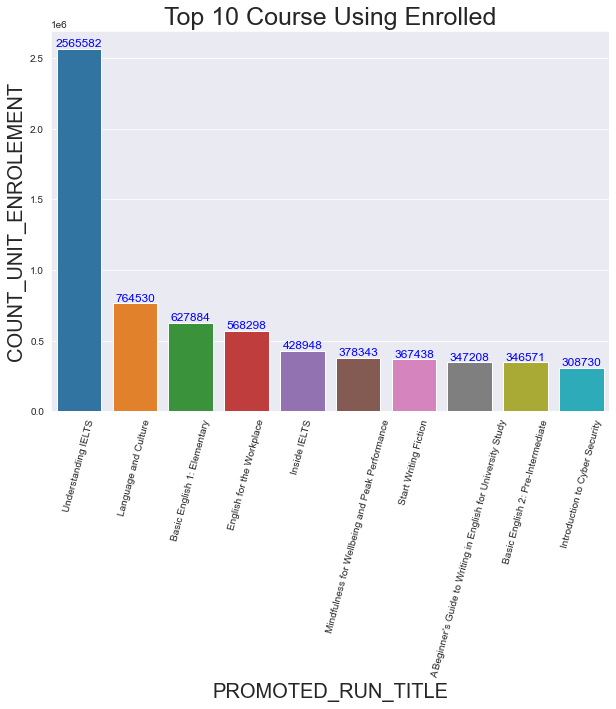

In [684]:
data=df.nlargest(10,'COUNT_UNIT_ENROLEMENT')
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.title("Top 10 Course Using Enrolled",fontsize=25)
plt.xlabel("Top 10 Course",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)

ax=sns.barplot(data.PROMOTED_RUN_TITLE,data.COUNT_UNIT_ENROLEMENT)
ax.set_xticklabels(rotation=75,labels=data.PROMOTED_RUN_TITLE)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


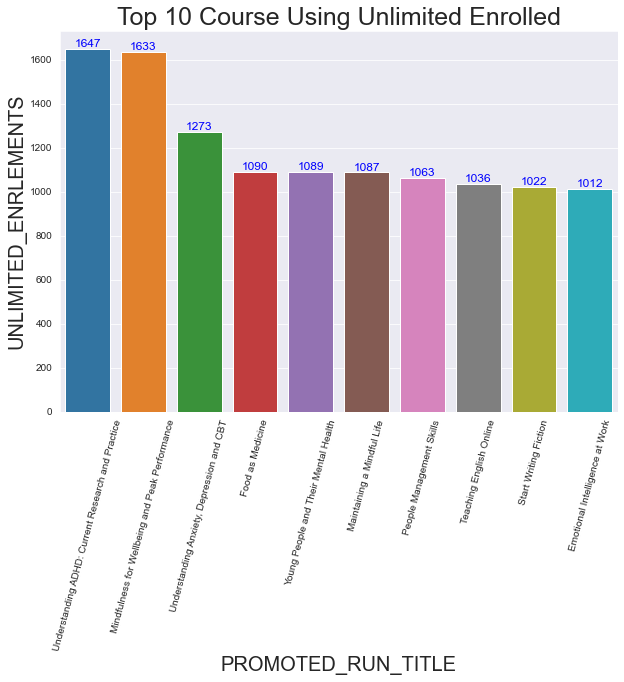

In [685]:
data=df.nlargest(10,'UNLIMITED_ENRLEMENTS')
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.title("Top 10 Course Using Unlimited Enrolled",fontsize=25)
plt.xlabel("Top 10 Course",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)

ax=sns.barplot(data.PROMOTED_RUN_TITLE,data.UNLIMITED_ENRLEMENTS)
ax.set_xticklabels(rotation=75,labels=data.PROMOTED_RUN_TITLE)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

Partners Analysis

/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


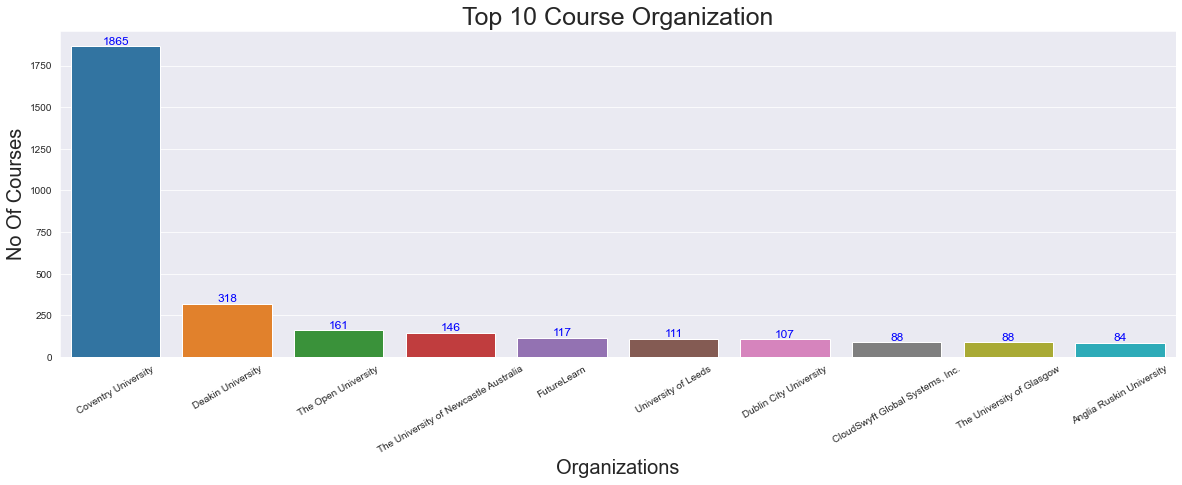

In [686]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
Top10=df.ORGANISATION_TITLE.value_counts().sort_values(ascending=False).head(10)
Top10
ax=sns.barplot(Top10.index,Top10.values)
ax.set_xticklabels(rotation=30,labels=Top10.index)
plt.title("Top 10 Course Organization",fontsize=25)
plt.xlabel("Organizations",fontsize=20)
plt.ylabel("No Of Courses",fontsize=20)


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')
    
plt.show()



/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

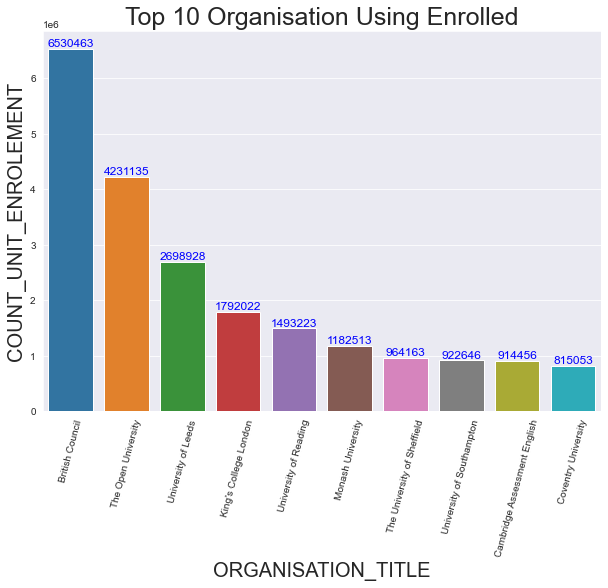

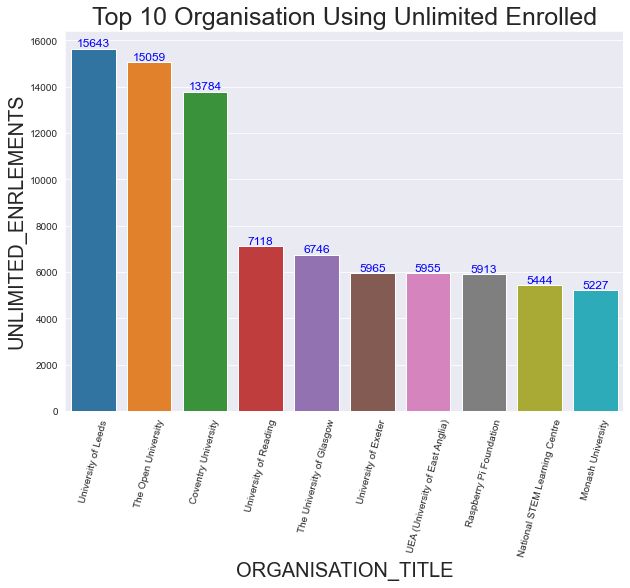

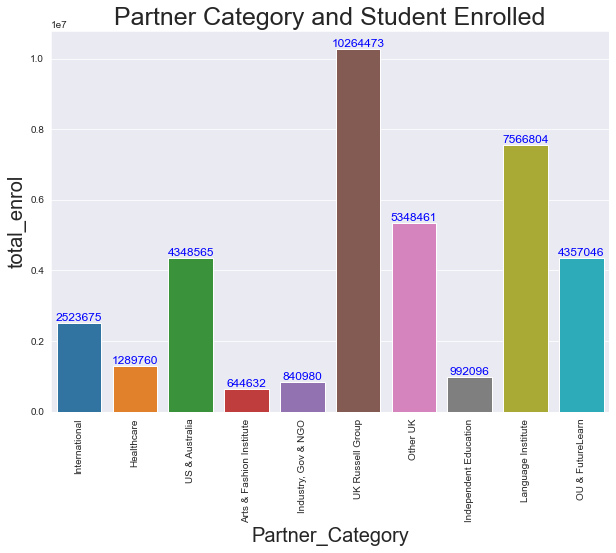

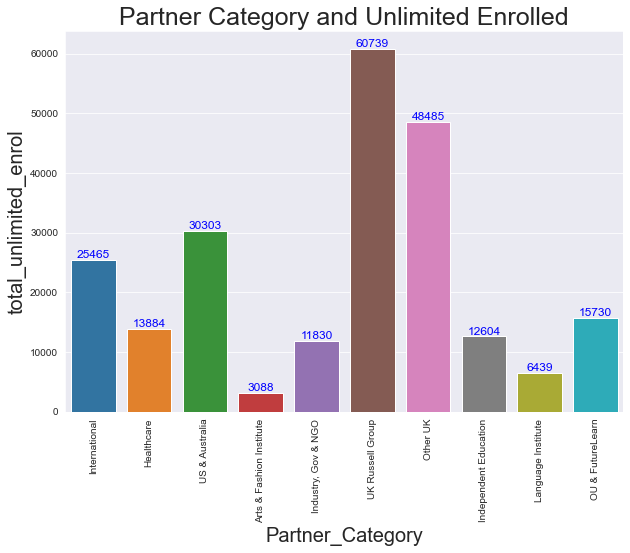

/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: min() arg is an empty sequence

<Figure size 1440x432 with 0 Axes>

In [687]:
dfp = pd.read_csv("data/partners.csv",index_col=0)

data2=dfp.nlargest(10,'COUNT_UNIT_ENROLEMENT')
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.title("Top 10 Organisation Using Enrolled",fontsize=25)
plt.xlabel("Top 10 Organisation",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)

ax=sns.barplot(data2.index,data2.COUNT_UNIT_ENROLEMENT)
ax.set_xticklabels(rotation=75,labels=data2.index)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')


data2=dfp.nlargest(10,'UNLIMITED_ENRLEMENTS')
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.title("Top 10 Organisation Using Unlimited Enrolled",fontsize=25)
plt.xlabel("Top 10 Organisation",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)

ax=sns.barplot(data2.index,data2.UNLIMITED_ENRLEMENTS)
ax.set_xticklabels(rotation=75,labels=data2.index)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')




partner_dict = pd.read_csv('data/partners_category_dict.csv', header=None, index_col=0, squeeze=True).to_dict()

dfp['Partner_Category'] = dfp.index.map(partner_dict)

df['Partner_Category'] = df.index.map(partner_dict)


dfp.to_csv('data/categorisedpartners.csv', index=True)

dfp.isnull().sum()

dfp['total_enrol'] = dfp.groupby('Partner_Category')['COUNT_UNIT_ENROLEMENT'].transform('sum')


plt.figure(figsize=(10,7))
plt.title("Partner Category and Student Enrolled",fontsize=25)
plt.xlabel("Partner_Category",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)
ax=sns.barplot(dfp.Partner_Category,dfp.total_enrol)
plt.xticks(rotation='vertical')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')


dfp['total_unlimited_enrol'] = dfp.groupby('Partner_Category')['UNLIMITED_ENRLEMENTS'].transform('sum')


plt.figure(figsize=(10,7))
plt.title("Partner Category and Unlimited Enrolled",fontsize=25)
plt.xlabel("Partner_Category",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)
ax=sns.barplot(dfp.Partner_Category,dfp.total_unlimited_enrol)
plt.xticks(rotation='vertical')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')


plt.show()

plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
Top10=df.Partner_Category.value_counts().sort_values(ascending=False).head(10)
Top10
ax=sns.barplot(Top10.index,Top10.values)
plt.xticks(rotation='vertical')
plt.title("Courses per Organisation Category",fontsize=25)
plt.xlabel("Organizations",fontsize=20)
plt.ylabel("No Of Courses",fontsize=20)


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

plt.show()